# Losses, Regularization, Evaluation

## Regularization

In [48]:
import sys
sys.path.append('/Users/jianlan/Desktop/prtools')
import prtools as pr
import numpy as np
import matplotlib.pyplot as plt

### Exercise 3.3

Lamda: 0
Square Error: 0.9970591930542837
---
Lamda: 0.01
Square Error: 0.9970904106342159
---
Lamda: 3
Square Error: 1.0031283850603145
---
Lamda: 10
Square Error: 1.0071608944204533
---


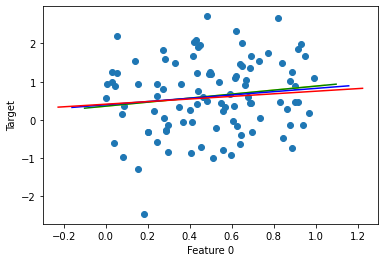

In [49]:
# Exercise 3.3
# input data set where the inputs x are drawn uniformly from the interval [0,1]
# output data add gaussian noise to the inputs
tr_size = 100
ts_size = 1000
x_train = np.random.rand(tr_size,1)
y_train = x_train + np.random.randn(tr_size,1)
x_test = np.random.rand(ts_size,1)
y_test = x_test + np.random.randn(ts_size,1)
# generate regression training data set
train_set = pr.gendatr(x_train,y_train)
# generate regression test data set 
test_set = pr.gendatr(x_test,y_test)
# regularizor from 0.1 to 100
regu_paras = [0,0.01,3,10]
color_list = ['yellow','green','blue','red']
# list storing diffrent regressors with different regularisation parameters
regre_w = []
for regu_para in regu_paras:
    w = pr.ridger(train_set,(regu_para))
    regre_w.append(w)
# plot 
pr.scatterr(train_set)
i = 0
# compute the square error for different lamdas in the test set
# apply regressor
for w in regre_w:
    pr.plotr(w,color_list[i])
    b = test_set*w
    e = pr.testr(b)
    print('Lamda: '+str(regu_paras[i])+'\n'+'Square Error: '+str(e)+'\n'+'---')
    i=i+1

determine which value for the regularization parameter gives, the best performance (training set size 2,10,100; parameters in range [10^-3,10^3])

possible way to find the optimal parametes (prcrossval)

values around 3 to be fairly optimal

## The Lasso

Another way of regularizing that is popular is through an **L1** norm instead of the **L2 norm**.

LASSO (least shrinkage and selection operator) has the following advantage:
- is able to result in a selection of features
- leads to a reduction of the number of features that the final regressor depends on 

### Exericise 3.7

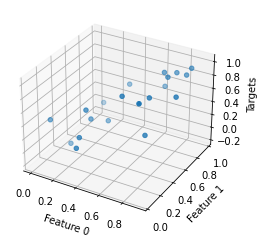

In [76]:
# 2D regression problem
tr_size = 20
x_train = np.random.rand(tr_size,2)
# np.reshape 
y_train = x_train[:,0].reshape((tr_size,1))+0.2*np.random.randn(tr_size,1)
# training data set
train_set = pr.gendatr(x_train,y_train)
# regularization parameters 
regu_paras = [0,0.01,3,10]
color_list = ['yellow','green','blue','red']
# list storing diffrent regressors with different regularisation parameters
regre_w = []
for regu_para in regu_paras:
    w = pr.ridger(train_set,(regu_para))
    regre_w.append(w)
# plot 
pr.scatterr(train_set)


## Learning Curves

Learning Curves show different classificcation errors for different size of traning data set.

In this section, it presents different learning curves for different classifiers.

### Exercise 3.14 

In [108]:
# training dataset size
tr_size = 1000
train_set = pr.gendath([tr_size,tr_size])
print(train_set)
# enlarge the feature dimensionality by adding 60 dimensions of class independent randomness



Highleyman dataset 2000 by 2 prdataset with 2 classes: [1000 1000]


(2000, 60)

In [102]:
help(pr.gendath)

Help on function gendath in module prtools.prtools:

gendath(n=(50, 50))
    Generation of Highleyman classes
    
        A = gendath(N)
    
    Generation of a 2-dimensional 2-class dataset A of N objects
    according to Highleyman. 
    
    The two Highleyman classes are defined by 
    1: Gauss([1 1],[1 0; 0 0.25]).
    2: Gauss([2 0],[0.01 0; 0 4]).
    Class priors are P(1) = P(2) = 0.5

